In [1]:
import numpy as np
import pandas as pd
import scipy
import os
import math
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import functools
from sklearn.datasets import fetch_openml

from sklearn import decomposition
import matplotlib.ticker as ticker
#import mpld3

#mpld3.enable_notebook()

from QuantumUtility.Utility import *

In [2]:
v = np.load('array784_exp.npy')
v_uni = np.load('array784.npy')
zero = np.load('sparse_arr_20.npy')
zero1 = np.load('sparse_arr_50.npy')


In [3]:
cwd = os.getcwd()
cwd

'/home/tommaso/Scrivania/TesiPolimi/Qsklearn/sklearn'

In [3]:
'''
zero = np.zeros(784)
values = np.random.uniform(-1, 1, (157))
index = np.arange(0,784)
indexes = np.random.choice(index,size=157,replace=False)

zero[indexes] = values
zero
'''

array([ 0.        ,  0.37995558,  0.        , -0.82512005,  0.        ,
        0.        , -0.22781405,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.5558728 ,  0.        , -0.49046316,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.93913496,
        0.        ,  0.        ,  0.        , -0.99411719,  0.59343024,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.75534607,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.33970893,  0.        ,
        0.54720688,  0.        ,  0.        ,  0.94793291,  0.  

In [9]:
dict_res_zero = L2_tomogrphy_parallel(zero, delta=0.1, n_jobs=-1,stop_when_reached_accuracy=False)
dict_res_zero_20per = L2_tomogrphy_parallel(zero1, delta=0.1, n_jobs=-1,stop_when_reached_accuracy=False)
dict_res_uni = L2_tomogrphy_parallel(v_uni, delta=0.1, n_jobs=-1,stop_when_reached_accuracy=False)
dict_res_exp = L2_tomogrphy_parallel(v, delta=0.1, n_jobs=-1,stop_when_reached_accuracy=False)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
21
24
29
34
41
48
58
68
81
96
114
135
160
189
224
265
314
373
441
523
619
733
869
1029
1219
1444
1710
2025
2398
2841
3364
3985
4719
5589
6620
7840
9286
10998
13025
15426
18270
21638
25628
30352
35947
42574
50423
59718
70727
83765
99207
117495
139155
164808
195190
231172
273788
324260
384036
454832
538678
637982
755591
894881
1059849
1255228
1486624
1760678
2085252
2469659
2924931
3464131
4102729
4859051
5754798
6815671
8072113
9560175
11322555
13409822
15881869
18809628
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
21
24
29
34
41
48
58
68
81
96
114
135
160
189
224
265
314
373
441
523
619
733
869
1029
1219
1444
1710
2025
2398
2841
3364
3985
4719
5589
6620
7840
9286
10998
13025
15426
18270
21638
25628
30352
35947
42574
50423
59718
70727
83765
99207
117495
139155
164808
195190
231172
273788
324260
384036
454832
538678
637982
755591
894881
1059849
1255228
1486624
1760678
2085252
2469659
2924931
3464131
4102729
4859051
5754798
6815671
8072113
9560

In [10]:
z = zero/np.linalg.norm(zero,ord=2)

z1 = zero1/np.linalg.norm(zero1,ord=2)

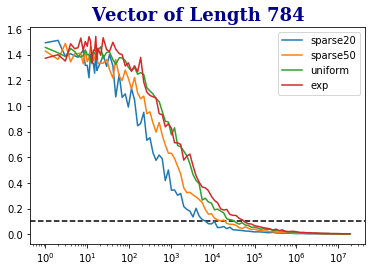

In [14]:
#dict_res = L2_tomogrphy_parallel(v, delta=0.1, n_jobs=-1)
meas_sparse = list(dict_res_zero.keys())
samples_sparse = list(dict_res_zero.values())
#print(samples[0])
for i in range(len(samples_sparse)):
    samples_sparse[i] = np.linalg.norm(z - samples_sparse[i],ord=2)

    
meas_sparse20 = list(dict_res_zero_20per.keys())
samples_sparse20 = list(dict_res_zero_20per.values())
#print(samples[0])
for i in range(len(samples_sparse20)):
    samples_sparse20[i] = np.linalg.norm(z1 - samples_sparse20[i],ord=2)
    
meas_sparse_uni = list(dict_res_uni.keys())
samples_sparse_uni = list(dict_res_uni.values())
#print(samples[0])
for i in range(len(samples_sparse_uni)):
    samples_sparse_uni[i] = np.linalg.norm(v_uni - samples_sparse_uni[i],ord=2)
    
    
meas_sparse_exp = list(dict_res_exp.keys())
samples_sparse_exp = list(dict_res_exp.values())
#print(samples[0])
for i in range(len(samples_sparse_exp)):
    samples_sparse_exp[i] = np.linalg.norm(v - samples_sparse_exp[i],ord=2)

#plt.hist(samples, bins=50, color="darkblue")
plt.title("Vector of Length 784", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
'''
idx_z = np.argwhere(np.diff(np.sign(np.full(shape=len(samples_sparse),fill_value=0.100) - samples_sparse))).flatten()
plt.plot(meas_sparse[idx_z[0]],0.1, 'ro')
plt.text(meas_sparse[idx_z[0]], 0.1, '({}, {})'.format(meas_sparse[idx_z[0]], 0.1))

idx_z20 = np.argwhere(np.diff(np.sign(np.full(shape=len(samples_sparse20),fill_value=0.100) - samples_sparse20))).flatten()
plt.plot(meas_sparse20[idx_z20[0]],0.1, 'ro')
plt.text(meas_sparse20[idx_z20[0]], 0.1, '({}, {})'.format(meas_sparse20[idx_z20[0]], 0.1))

idx_uni = np.argwhere(np.diff(np.sign(np.full(shape=len(samples_sparse_uni),fill_value=0.100) - samples_sparse_uni))).flatten()
plt.plot(meas_sparse_uni[idx_uni[0]],0.1, 'ro')
plt.text(meas_sparse_uni[idx_uni[0]], 0.1, '({}, {})'.format(meas_sparse_uni[idx_uni[0]], 0.1))

idx_exp = np.argwhere(np.diff(np.sign(np.full(shape=len(samples_sparse_exp),fill_value=0.100) - samples_sparse_exp))).flatten()
plt.plot(meas_sparse_exp[idx_exp[0]],0.1, 'ro')
plt.text(meas_sparse_exp[idx_exp[0]], 0.1, '({}, {})'.format(meas_sparse_exp[idx_exp[0]], 0.1))
'''

plt.axhline(y=0.100,color='k', linestyle='--')
plt.xscale('log')
plt.plot(meas_sparse,samples_sparse,label="sparse20")
plt.plot(meas_sparse20,samples_sparse20,label="sparse50")
plt.plot(meas_sparse_uni,samples_sparse_uni,label="uniform")
plt.plot(meas_sparse_exp,samples_sparse_exp,label="exp")
plt.legend()
plt.show()



30352

# Exponential case

# Average error on 1000 tomography test

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

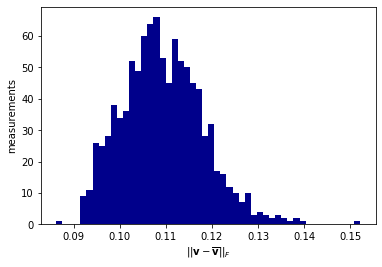

In [6]:
samples = []
for i in range(1000):
    # Create a noisy copy

    
    B = L2_tomographyVector_rightSign(v_uni, delta=0.1,N=30352)
    #B = make_noisy_vec(v,noise=0.1,unitary=True)
    print(i)
    # Append the Frobenius norm of A-B to the samples
    samples.append(np.linalg.norm(v_uni - B,ord=2))

# Plot the samples
plt.hist(samples, bins=50, color="darkblue")
plt.xlabel(r"$||\mathbf{v} - \overline{\mathbf{v}}||_F$")
plt.ylabel("measurements")
plt.show()

In [18]:
np.round(0.99625,2)

0.1

# Truncated Gaussian Noise

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

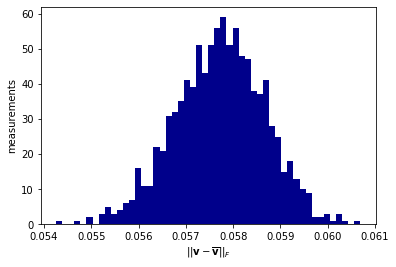

In [6]:
samples = []
for i in range(1000):
    # Create a noisy copy
    B = make_noisy_vec(v,noise=0.1)
    print(i)
    # Append the Frobenius norm of A-B to the samples
    samples.append(np.linalg.norm(v - B,ord=2))

# Plot the samples
plt.hist(samples, bins=50, color="darkblue")
plt.xlabel(r"$||\mathbf{v} - \overline{\mathbf{v}}||_F$")
plt.ylabel("measurements")
plt.show()

# Tomography test
    

In [18]:
delta = [0.8,0.6,0.5,0.3,0.1]

for d in delta:
    norm = np.linalg.norm(v- L2_tomographyVector_rightSign(v,delta = d),ord = 2)
    if norm < d:
        print('delta:',d,'norm:',norm,'ok')

delta: 0.8 norm: 0.02846440915783249 ok
delta: 0.6 norm: 0.021044759326127205 ok
delta: 0.5 norm: 0.016928703361723852 ok
delta: 0.3 norm: 0.009945918541329118 ok
delta: 0.1 norm: 0.003394846482541 ok
